## 1. Setup and Dependencies

Install necessary packages:

Import required libraries:

In [1]:
# pip install tensorflow opencv-python scikit-learn matplotlib
import tensorflow as tf
import numpy as np
import cv2
import os
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

## 2. Data Collection and Preprocessing

Data Collection: Organize your dataset such that each person's images are in separate folders.
    

Data Preprocessing: Load the images, resize them, normalize the pixel values, and encode the labels.
    

In [2]:
def load_data(data_dir, img_size):
    images = []
    labels = []
    label_names = os.listdir(data_dir)
    for label, name in enumerate(label_names):
        folder_path = os.path.join(data_dir, name)
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (img_size, img_size))
            images.append(img)
            labels.append(label)
    images = np.array(images) / 255.0
    labels = np.array(labels)
    return images, labels, label_names

img_size = 48
data_dir = 'C:/Users/St.Josephs/Documents/FACE EMOTION DATASET/images/train'
images, labels, label_names = load_data(data_dir, img_size)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, len(label_names))
y_test = to_categorical(y_test, len(label_names))

## 3. Model Creation
Build a CNN model suitable for face recognition:

In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(label_names), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 128)         0

## 4. Training the Model
Train the model with the training data:

In [4]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/5
721/721 [==============================] - 45s 61ms/step - loss: 1.7832 - accuracy: 0.2650 - val_loss: 1.6030 - val_accuracy: 0.3913
Epoch 2/5
721/721 [==============================] - 44s 61ms/step - loss: 1.5462 - accuracy: 0.3938 - val_loss: 1.4312 - val_accuracy: 0.4487
Epoch 3/5
721/721 [==============================] - 44s 61ms/step - loss: 1.4223 - accuracy: 0.4538 - val_loss: 1.3485 - val_accuracy: 0.4845
Epoch 4/5
721/721 [==============================] - 45s 62ms/step - loss: 1.3413 - accuracy: 0.4891 - val_loss: 1.2916 - val_accuracy: 0.5055
Epoch 5/5
721/721 [==============================] - 45s 62ms/step - loss: 1.2847 - accuracy: 0.5075 - val_loss: 1.2506 - val_accuracy: 0.5176


## 5. Model Evaluation
Evaluate the model using the test set:

In [5]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.2f}')

181/181 [==============================] - 3s 14ms/step - loss: 1.2506 - accuracy: 0.5176
Test Accuracy: 0.52


## 6. Confusion Matrix
Generate predictions and calculate the confusion matrix:

In [6]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)

181/181 [==============================] - 3s 15ms/step


Visualize the confusion matrix using matplotlib:

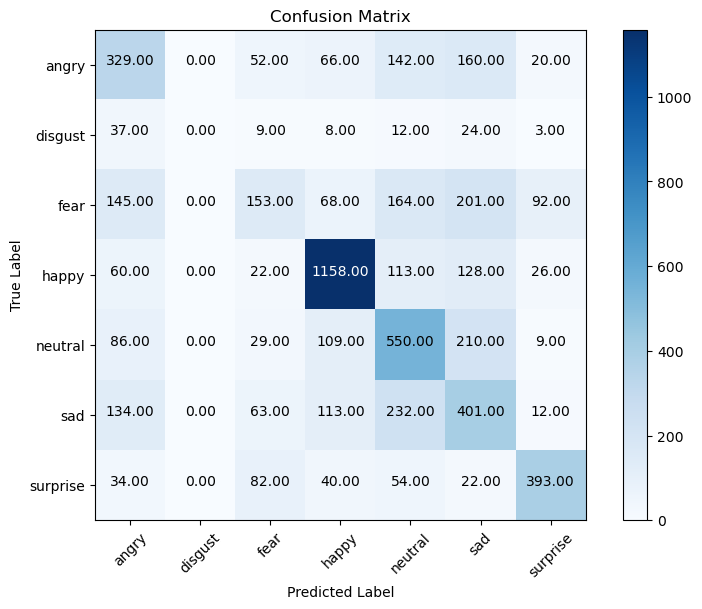

In [7]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

plot_confusion_matrix(cm, classes=label_names, title='Confusion Matrix')
plt.show()

## 7. Classification Report
Generate a classification report to get precision, recall, and F1-score:

In [28]:
import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')

print(classification_report(y_true_classes, y_pred_classes, target_names=label_names))

              precision    recall  f1-score   support

       angry       0.40      0.43      0.41       769
     disgust       0.00      0.00      0.00        93
        fear       0.37      0.19      0.25       823
       happy       0.74      0.77      0.75      1507
     neutral       0.43      0.55      0.49       993
         sad       0.35      0.42      0.38       955
    surprise       0.71      0.63      0.67       625

    accuracy                           0.52      5765
   macro avg       0.43      0.43      0.42      5765
weighted avg       0.51      0.52      0.51      5765



## 8. Face Recognition on New Images

Load a new image, preprocess it, and predict using the trained model:

In [9]:
def recognize_face(image_path, model, label_names, img_size):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (img_size, img_size))
    img = np.expand_dims(img / 255.0, axis=0)
    predictions = model.predict(img)
    predicted_label = np.argmax(predictions[0])
    return label_names[predicted_label]

image_path = 'C:/Users/St.Josephs/Documents/FACE EMOTION DATASET/images/train/angry/0.jpg'
recognized_face = recognize_face(image_path, model, label_names, img_size)
print(f'Recognized Face: {recognized_face}')

1/1 [==============================] - 0s 23ms/step
Recognized Face: angry


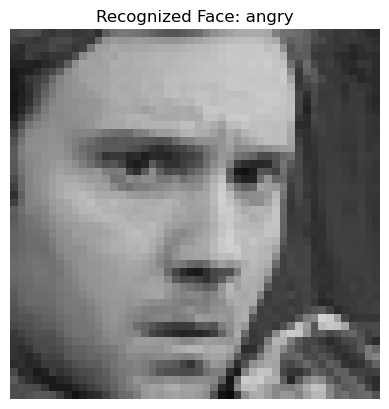

In [14]:
# Display the image
img1 = cv2.imread(image_path)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.axis('off')  # Hide axes
plt.title(f'Recognized Face: {recognized_face}')  # Add your title
plt.show()

In [16]:
test_loss, test_acc = model.evaluate(X_train, y_train)
print(f'Test Accuracy: {test_acc:.2f}')

721/721 [==============================] - 11s 15ms/step - loss: 1.1298 - accuracy: 0.5777
Test Accuracy: 0.58


In [17]:
X_train_count = len(X_train)
X_test_count = len(X_test)

print(f'Number of samples in X_train: {X_train_count}')
print(f'Number of samples in X_test: {X_test_count}')

Number of samples in X_train: 23056
Number of samples in X_test: 5765


In [19]:
import pandas as pd

# Assuming y_train and y_test are already defined as numpy arrays or lists
# y_train and y_test contain the labels for X_train and X_test respectively

# Convert labels to pandas Series
y_train_series = pd.DataFrame(y_train)
y_test_series = pd.DataFrame(y_test)

# View count for each label in y_train
print('Label counts in y_train:')
print(y_train_series.value_counts())

# View count for each label in y_test
print('\nLabel counts in y_test:')
print(y_test_series.value_counts())

Label counts in y_train:
0    1    2    3    4    5    6  
0.0  0.0  0.0  1.0  0.0  0.0  0.0    5657
               0.0  1.0  0.0  0.0    3989
                    0.0  1.0  0.0    3983
          1.0  0.0  0.0  0.0  0.0    3280
1.0  0.0  0.0  0.0  0.0  0.0  0.0    3224
0.0  0.0  0.0  0.0  0.0  0.0  1.0    2580
     1.0  0.0  0.0  0.0  0.0  0.0     343
Name: count, dtype: int64

Label counts in y_test:
0    1    2    3    4    5    6  
0.0  0.0  0.0  1.0  0.0  0.0  0.0    1507
               0.0  1.0  0.0  0.0     993
                    0.0  1.0  0.0     955
          1.0  0.0  0.0  0.0  0.0     823
1.0  0.0  0.0  0.0  0.0  0.0  0.0     769
0.0  0.0  0.0  0.0  0.0  0.0  1.0     625
     1.0  0.0  0.0  0.0  0.0  0.0      93
Name: count, dtype: int64


In [20]:
import numpy as np

# Assuming y_train and y_test are already defined as numpy arrays or lists
# y_train and y_test contain the labels for X_train and X_test respectively

# View count for each label in y_train
unique_labels_train, counts_train = np.unique(y_train, return_counts=True)
print('Label counts in y_train:')
for label, count in zip(unique_labels_train, counts_train):
    print(f'Label {label}: {count} samples')

# View count for each label in y_test
unique_labels_test, counts_test = np.unique(y_test, return_counts=True)
print('\nLabel counts in y_test:')
for label, count in zip(unique_labels_test, counts_test):
    print(f'Label {label}: {count} samples')

Label counts in y_train:
Label 0.0: 138336 samples
Label 1.0: 23056 samples

Label counts in y_test:
Label 0.0: 34590 samples
Label 1.0: 5765 samples


## 1. View Data Shapes
You can check the shape of your loaded data to understand its dimensions:

In [21]:
print(f'Shape of images: {images.shape}')  # (num_samples, img_size, img_size, num_channels)
print(f'Shape of labels: {labels.shape}')  # (num_samples,)
print(f'Unique labels: {np.unique(labels)}')  # List of unique labels
print(f'Label names: {label_names}')  # List of label names

Shape of images: (28821, 48, 48, 3)
Shape of labels: (28821,)
Unique labels: [0 1 2 3 4 5 6]
Label names: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


## 2. View Sample Data (Images and Labels)
You can print out some of the data to ensure it's loaded correctly:

In [22]:
# View the first 5 labels and corresponding label names
for i in range(5):
    print(f'Label {i}: {labels[i]} ({label_names[labels[i]]})')

Label 0: 0 (angry)
Label 1: 0 (angry)
Label 2: 0 (angry)
Label 3: 0 (angry)
Label 4: 0 (angry)


## 3. Visualize Sample Images
Using Matplotlib, you can visualize some of the images to confirm they are loaded correctly:

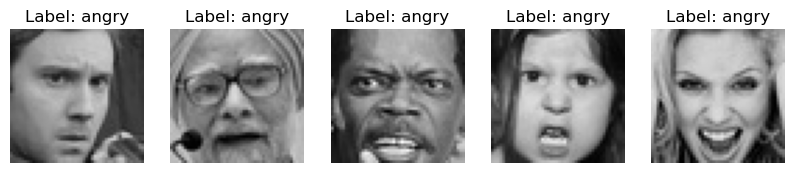

In [23]:
import matplotlib.pyplot as plt

# Plot the first 5 images with their labels
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i])
    plt.title(f'Label: {label_names[labels[i]]}')
    plt.axis('off')
plt.show()

## 4. Count of Each Label
As discussed before, you can count the occurrences of each label to ensure your dataset is balanced:

In [24]:
unique_labels, counts = np.unique(labels, return_counts=True)
print('Label counts:')
for label, count in zip(unique_labels, counts):
    print(f'{label_names[label]}: {count} samples')

Label counts:
angry: 3993 samples
disgust: 436 samples
fear: 4103 samples
happy: 7164 samples
neutral: 4982 samples
sad: 4938 samples
surprise: 3205 samples
